In [305]:
import pandas as pd
import seaborn as sb
import numpy as np
import calendar

                                               PUNTO 1

In [287]:
def intervalo_confianza(duraciones_totales, valor_z = 2.57):
    media = np.mean(duraciones_totales)
    #valor_z = 2.57
    desvio = np.std(duraciones_totales)
    n = len(duraciones_totales)
    ext_inferior = media - (valor_z * (desvio/(n ** 0.5)))
    ext_superior = media + (valor_z * (desvio/(n ** 0.5)))
    return round(ext_inferior,2), round(ext_superior,2)

In [193]:
def simulacion(cant_minima_stock):
    DIASXAÑO= 250
    MAX_AÑOS = 30
    PRODUCTOS_EN_INVENTARIO = 80
    PRODUCCION_DIARIA = 130 #por cada turno
    COSTO_STOCK = 70 #por producto por dia

    stock_actual = PRODUCTOS_EN_INVENTARIO
    contador_turnos_adicionales = 0
    contador_costo_stock = 0
    turnos_adicionales =[]
    costos_anuales = []
    turnos_diario = 0
    costo_stock_diario = 0

    for i in range(MAX_AÑOS): 
        turnos_diario = 0
        costo_stock_diario = 0
        for j in range(DIASXAÑO):
            contador_turnos_adicionales = 0
            contador_costo_stock = 0
            stock_actual = stock_actual + PRODUCCION_DIARIA
            demanda_diaria = round(np.random.normal(loc=150, scale=25))
            stock_actual = stock_actual - demanda_diaria
            if (stock_actual <= cant_minima_stock):
                contador_turnos_adicionales+=1
                stock_actual = stock_actual + PRODUCCION_DIARIA
            # finaliza el dia
            turnos_diario= turnos_diario + contador_turnos_adicionales
            costo_stock_diario = stock_actual * COSTO_STOCK
        # finaliza el año
        turnos_adicionales.append(turnos_diario)
        costos_anuales.append(costo_stock_diario)

    return turnos_adicionales, costos_anuales

### Resultado para 50 unidades de stock minimo

### Histograma e Intervalo de Confianza con 99% de confiabilidad

In [208]:
turnos_adicionales, costos_anuales = simulacion(50)

In [209]:
print(f"El promedio de costo anual es: ${round((sum(costos_anuales)/len(costos_anuales)),2)}")
print(f"El intervalo de confianza del 99% para los valores de costos anuales es: {intervalo_confianza(costos_anuales)}")

print(f"El promedio de turnos adicionales anuales es: {round((sum(turnos_adicionales)/len(turnos_adicionales)),2)} ")
print(f"El intervalo de confianza del 99% para los valores de turnos es: {intervalo_confianza(turnos_adicionales)}")

El promedio de costo anual es: $7674.33
El intervalo de confianza del 99% para los valores de costos anuales es: (6354.15, 8994.51)
El promedio de turnos adicionales anuales es: 38.57 
El intervalo de confianza del 99% para los valores de turnos es: (37.08, 40.05)


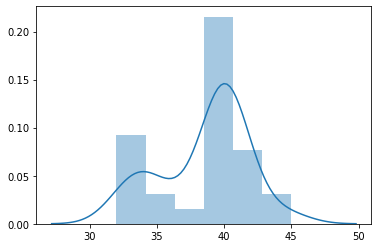

In [211]:
grafico = sb.distplot(turnos_adicionales)

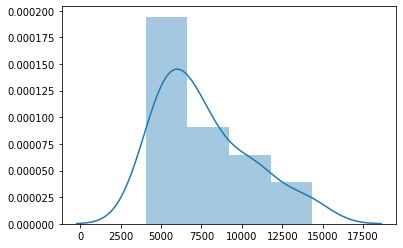

In [210]:
grafico = sb.distplot(costos_anuales)

### Resultado para 60 unidades de stock minimo

### Histograma e Intervalo de Confianza con 99% de confiabilidad

In [212]:
turnos_adicionales, costos_anuales = simulacion(60)

In [213]:
print(f"El promedio de costo anual es: ${round((sum(costos_anuales)/len(costos_anuales)),2)}")
print(f"El intervalo de confianza del 99% para los valores de costos anuales es: {intervalo_confianza(costos_anuales)}")

print(f"EL promedio de turnos adicionales anuales es: {round((sum(turnos_adicionales)/len(turnos_adicionales)),2)} ")
print(f"El intervalo de confianza del 99% para los valores de turnos es: {intervalo_confianza(turnos_adicionales)}")

El promedio de costo anual es: $9293.67
El intervalo de confianza del 99% para los valores de costos anuales es: (8000.84, 10586.49)
EL promedio de turnos adicionales anuales es: 39.23 
El intervalo de confianza del 99% para los valores de turnos es: (37.96, 40.51)


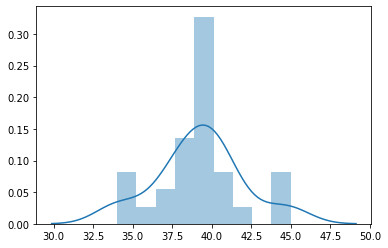

In [215]:
grafico = sb.distplot(turnos_adicionales)

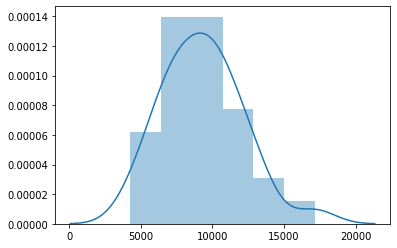

In [214]:
grafico = sb.distplot(costos_anuales)

### Resultado para 70 unidades de stock minimo

In [216]:
turnos_adicionales, costos_anuales = simulacion(70)

In [217]:
print(f"El promedio de costo anual es: ${round((sum(x for x in costos_anuales)/len(costos_anuales)),2)}")
print(f"El intervalo de confianza del 99% para los valores de costos anuales es: {intervalo_confianza(costos_anuales)}")

print(f"EL promedio de turnos adicionales anuales es: {round((sum(x for x in turnos_adicionales)/len(turnos_adicionales)),2)} ")
print(f"El intervalo de confianza del 99% para los valores de turnos es: {intervalo_confianza(turnos_adicionales)}")

El promedio de costo anual es: $9608.67
El intervalo de confianza del 99% para los valores de costos anuales es: (8342.48, 10874.86)
EL promedio de turnos adicionales anuales es: 37.9 
El intervalo de confianza del 99% para los valores de turnos es: (36.43, 39.37)


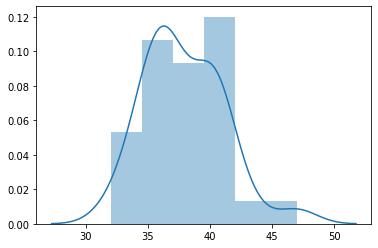

In [218]:
grafico = sb.distplot(turnos_adicionales)

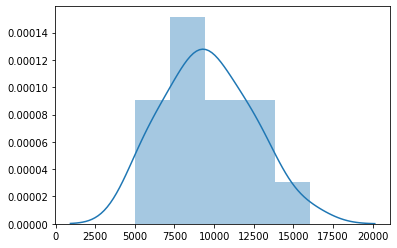

In [219]:
sb.distplot(costos_anuales)

                                            PUNTO 2

In [171]:
def getValorAleatorio(nombre):
    probabilidad = np.random.uniform()
    if nombre == "DEMANDA":
        if (probabilidad <= 0.03):
            return 40 
        if (probabilidad <= 0.2):
            return 25
        if (probabilidad <= 0.24):
            return 30
        if (probabilidad <= 0.42):
            return 50
        if (probabilidad <= 0.62):
            return 100
        if (probabilidad <= 0.65):
            return 150
        if (probabilidad <= 0.8):
            return 200
        if (probabilidad <= 0.9):
            return 250
        if (probabilidad <= 1.0):
            return 300
    
    elif nombre == "RETARDO_PAPELEO":
        if (probabilidad <= 0.2):
            return 1
        if (probabilidad <= 0.3):
            return 2
        if (probabilidad <= 0.25):
            return 3
        if (probabilidad <= 1.25):
            return 4
        
    else: #tiempo a que llegue el pedido  
        if (probabilidad <= 0.1):
            return 5
        if (probabilidad <= 0.2):
            return 2
        if (probabilidad <= 0.4):
            return 1
        if (probabilidad <= 0.15):
            return 3
        if (probabilidad <= 1):
            return 4
        

In [172]:
class Evento():
    def __init__(self,nombre, arribo, duracion, cantidad):
        self.nombre = nombre
        self.arribo = arribo
        self.duracion = 0
        self.tiempo_fin = arribo + duracion
        self.cantidad = cantidad
    def __repr__(self):
        return f"-{self.nombre} - arribo: {self.arribo} - duracion: {self.duracion} - termina: {self.tiempo_fin} - cantidad_ {self.cantidad}\n"

In [173]:
def agregarEventoAFel(fel,evento):
    """
    Esta funcion agrega eventos al diccionario fel. Si el diccionario
    tiene eventos en la lista, agrega el evento a la lista existente.
    la clave de la fel es el tiempo de llegada del evento que es un entero
    """
    lista_eventos = fel.get(evento.tiempo_fin, None)
    if lista_eventos:
        fel[evento.tiempo_fin].append(evento) #agrego el evento a la lista de eventos existente
    else:
        fel[evento.tiempo_fin]=[evento] #agrego la lista de eventos para ese momento de reloj en la fel

In [180]:
def simulacion(cantidad_dias):
    mantenimiento = 450 #por unidad por dia
    precio_pedido = 3800 #por orden
    precio_faltante = 625 #por unidad
    stock_actual = 1500 #unidades a un costo de $950
    cantidad_orden = 100
    punto_reorden = 15
    reloj = 0
    delta = 1
    fel = {}
    costos = []

    costo_por_faltante_diario = 0
    costo_por_pedido_diario = 0
    costo_por_stock_diario = 0
    costo_mantenimiento_diario = 0
    costo_total = 0
    
    for i in range(cantidad_dias):
        e = Evento(nombre="DEMANDA", arribo=reloj, duracion=0, cantidad=getValorAleatorio("DEMANDA"))
        agregarEventoAFel(fel, e)
        eventos_de_hoy = fel[reloj]  

        costo_por_faltante = 0
        costo_por_pedido_diario = 0
        costo_diario = 0
        for evento in eventos_de_hoy:
            if evento.nombre == "DEMANDA":
                if (evento.cantidad <= stock_actual): #checkea si tengo stock para el pedido
                    e = Evento(nombre="RETARDO_PAPELEO",
                                arribo=reloj,
                                duracion=getValorAleatorio("RETARDO_PAPELEO"),
                                cantidad=evento.cantidad)
                    
                    agregarEventoAFel(fel,e)
                    stock_actual = stock_actual - evento.cantidad #cantidad demandada
                else: #Pedir mas producto
                    costo_por_faltante_diario = abs(stock_actual - valor_demanda) * precio_faltante
                    e = Evento(nombre="RETARDO_PEDIDO",
                             arribo=reloj,
                             duracion=getValorAleatorio("RETARDO_PEDIDO"),
                             cantidad=cantidad_orden) #cantidad que pido por orden
                    
                    agregarEventoAFel(fel,e)
                    costo_por_pedido_diario = costo_por_pedido_diario + precio_pedido

            elif evento.nombre == "RETARDO_PEDIDO": #indica que llego un pedido solicitado con x cantidad
                stock_actual = stock_actual + evento.cantidad

            elif evento.nombre == "RETARDO_PAPELEO":
                pass

        reloj += delta
        costo_mantenimiento_diario = stock_actual * mantenimiento
        costo_diario =  costo_por_faltante + costo_por_pedido_diario + costo_mantenimiento_diario
        #costo_total += costo_total + costo_diario  
        costos.append(costo_diario)
    return costos

In [181]:
costo_anual = simulacion(365)

### Promedio de costo diario

In [182]:
print("promedio costo diario: $" + str(round(sum(costo_anual)/len(costo_anual),2)))

promedio costo diario: $53194.93


### Costo Anual

In [183]:
print(f'Costo anual: ${sum(costo_anual)}')

Costo anual: $19416150


### Histograma e Intervalo de Confianza con 99% de confiabilidad

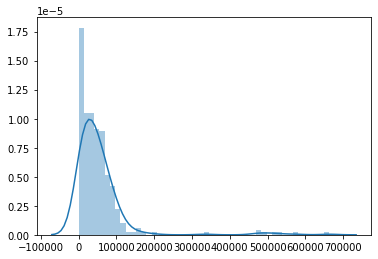

In [185]:
sb.distplot(costo_anual)

In [186]:
intervalo_confianza(costo_anual)

(42855.05, 63534.81)

                                            punto 3

In [256]:
def simulacion2(cantidad_dias, limite_inferior_stock):
    
    costo_unitario = 450
    costo_orden = 93 #por unidad!
    costo_almacen = 35 #por dia
    costo_por_faltante = 20 #por unidad
    stock_actual = 150

    reloj = 0
    delta = 1
    fel = {}
    costos = []

    costo_por_faltante_diario = 0
    costo_por_pedido_diario = 0
    costo_por_stock_diario = 0
    costo_mantenimiento_diario = 0
    costo_total = 0
    
    for i in range(cantidad_dias):
        e = Evento(nombre="DEMANDA", arribo=reloj, duracion=0, cantidad=np.random.poisson(37))
        agregarEventoAFel(fel, e)
        eventos_de_hoy = fel[reloj]  

        costo_por_faltante = 0
        costo_por_pedido_diario = 0
        costo_diario = 0
        for evento in eventos_de_hoy:
            if evento.nombre == "DEMANDA":
                if ((evento.cantidad <= stock_actual) and (stock_actual > limite_inferior_stock)): 
                    #si tengo stock disponible y estoy por encima del valor minimo tolerable de stock
                    stock_actual = stock_actual - evento.cantidad #cantidad demandada
                
                else: #Pedir mas producto
                    costo_por_faltante_diario = abs(stock_actual - valor_demanda) * precio_faltante
                    e = Evento(nombre="RETARDO_PEDIDO",
                             arribo=reloj,
                             duracion=3,
                             cantidad=cantidad_orden) #cantidad que pido por orden
                    
                    agregarEventoAFel(fel,e)
                    costo_por_pedido_diario = costo_por_pedido_diario + precio_pedido

            elif evento.nombre == "RETARDO_PEDIDO": #indica que llego un pedido solicitado con x cantidad
                stock_actual = stock_actual + evento.cantidad


        reloj += delta
        costo_mantenimiento_diario = stock_actual * mantenimiento
        costo_diario =  costo_por_faltante + costo_por_pedido_diario + costo_mantenimiento_diario
        #costo_total += costo_total + costo_diario  
        costos.append(costo_diario)
    return costos

## Costos Anuales
#### Para estrategia de pedido cuando stock < 15 unidades

In [257]:
costos1 = simulacion2(365,15)
sum(costos1)

13393350

In [258]:
intervalo_confianza(costos1)

(32950.77, 40437.45)

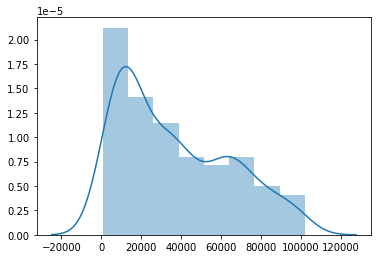

In [259]:
grafico = sb.distplot(costos1)

#### Para estrategia de pedido cuando stock < 30 unidades

In [260]:
costos2 = simulacion2(365,30)
sum(costos2)

14594000

In [261]:
intervalo_confianza(costos2)

(36102.71, 43864.41)

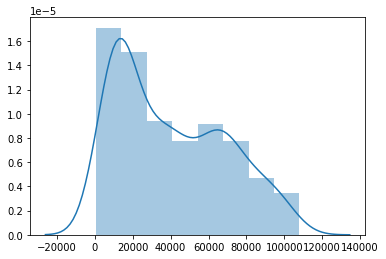

In [262]:
grafico = sb.distplot(costos2)

#### Para estrategia de pedido cuando stock < 40 unidades

In [263]:
costos3 = simulacion2(365,40)
sum(costos)

14629350

In [264]:
intervalo_confianza(costos3)

(38383.96, 46163.16)

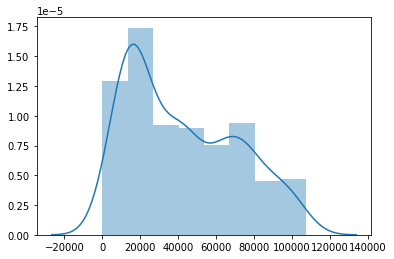

In [265]:
grafico = sb.distplot(costos3)

## Costos Mensuales

In [281]:
def simulacion3(limite_inferior_stock):
    
    costo_unitario = 450
    costo_orden = 93 #por unidad!
    costo_almacen = 35 #por dia
    costo_por_faltante = 20 #por unidad
    stock_actual = 150

    reloj = 0
    delta = 1
    fel = {}
    costos_mensuales = {}

    costo_por_faltante_diario = 0
    costo_por_pedido_diario = 0
    costo_por_stock_diario = 0
    costo_mantenimiento_diario = 0
    costo_diario = 0
    mensual = []
    
    for i in range(12): #un año
        mensual = []
        for j in range(30): #un mes
            e = Evento(nombre="DEMANDA", arribo=reloj, duracion=0, cantidad=np.random.poisson(37))
            agregarEventoAFel(fel, e)
            eventos_de_hoy = fel[reloj]  

            costo_por_faltante = 0
            costo_por_pedido_diario = 0
            costo_diario = 0
            for evento in eventos_de_hoy:
                if evento.nombre == "DEMANDA":
                    if ((evento.cantidad <= stock_actual) and (stock_actual > limite_inferior_stock)): 
                        #si tengo stock disponible y estoy por encima del valor minimo tolerable de stock
                        stock_actual = stock_actual - evento.cantidad #cantidad demandada

                    else: #Pedir mas producto
                        costo_por_faltante_diario = abs(stock_actual - valor_demanda) * precio_faltante
                        e = Evento(nombre="RETARDO_PEDIDO",
                                 arribo=reloj,
                                 duracion=3,
                                 cantidad=cantidad_orden) #cantidad que pido por orden

                        agregarEventoAFel(fel,e)
                        costo_por_pedido_diario = costo_por_pedido_diario + precio_pedido

                elif evento.nombre == "RETARDO_PEDIDO": #indica que llego un pedido solicitado con x cantidad
                    stock_actual = stock_actual + evento.cantidad


            reloj += delta
            costo_mantenimiento_diario = stock_actual * mantenimiento
            costo_diario = costo_por_faltante + costo_por_pedido_diario + costo_mantenimiento_diario
            mensual.append(costo_diario)
        costos_mensuales[i] = mensual
    return costos_mensuales

#### Costo mensual para estrategia de pedido cuando stock < 15 unidades

In [334]:
costos_mensuales = simulacion3(15)

January el promedio de costos fue de 33480
February el promedio de costos fue de 44837
March el promedio de costos fue de 45698
April el promedio de costos fue de 32993
May el promedio de costos fue de 31665
June el promedio de costos fue de 41108
July el promedio de costos fue de 43757
August el promedio de costos fue de 37973
September el promedio de costos fue de 41205
October el promedio de costos fue de 38505
November el promedio de costos fue de 39953
December el promedio de costos fue de 46847


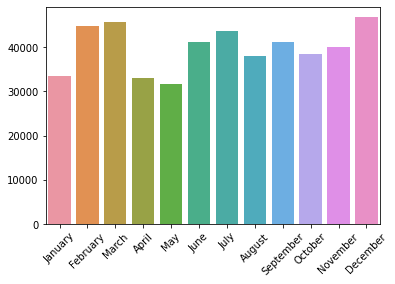

In [335]:
# Calculo el promedio mensual
for k, v in costos_mensuales.items():
    print(f"{calendar.month_name[k+1]} el promedio de costos fue de {round(sum(v)/len(v))}")
    
for k, v in costos_mensuales.items():
    costos_mensuales[k] = round(sum(v)/len(v))

# Obtengo una lista de los promedios de costos mensuales
lista_costos_mensuales = list(costos_mensuales.values())

# Grafico
lista = [calendar.month_name[x+1] for x in range(len(lista_costos_mensuales))]
ax = sb.barplot(x=lista, y=lista_costos_mensuales)
for item in ax.get_xticklabels():
    item.set_rotation(45)

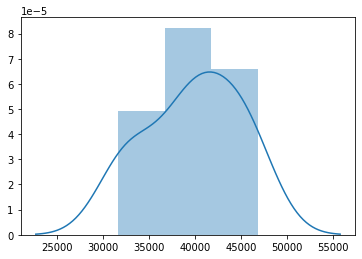

In [336]:
grafico = sb.distplot(lista_costos_mensuales)

#### Costo mensual para estrategia de pedido cuando stock < 30 unidades

In [338]:
costos_mensuales = simulacion3(30)

January el promedio de costos fue de 31950
February el promedio de costos fue de 37532
March el promedio de costos fue de 40823
April el promedio de costos fue de 34185
May el promedio de costos fue de 41685
June el promedio de costos fue de 42227
July el promedio de costos fue de 41198
August el promedio de costos fue de 38550
September el promedio de costos fue de 37043
October el promedio de costos fue de 48662
November el promedio de costos fue de 37605
December el promedio de costos fue de 41537


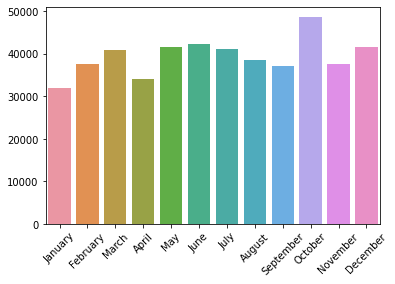

In [339]:
# Calculo el promedio mensual
for k, v in costos_mensuales.items():
    print(f"{calendar.month_name[k+1]} el promedio de costos fue de {round(sum(v)/len(v))}")
    
for k, v in costos_mensuales.items():
    costos_mensuales[k] = round(sum(v)/len(v))

# Obtengo una lista de los promedios de costos mensuales
lista_costos_mensuales = list(costos_mensuales.values())

# Grafico
lista = [calendar.month_name[x+1] for x in range(len(lista_costos_mensuales))]
ax = sb.barplot(x=lista, y=lista_costos_mensuales)
for item in ax.get_xticklabels():
    item.set_rotation(45)

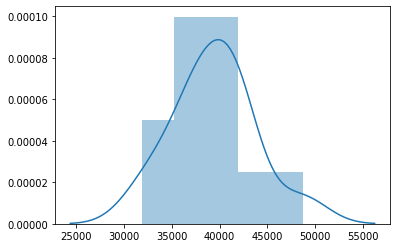

In [340]:
grafico = sb.distplot(lista_costos_mensuales)

#### Costo mensual para estrategia de pedido cuando stock < 40 unidades

In [341]:
costos_mensuales = simulacion3(40)

January el promedio de costos fue de 41595
February el promedio de costos fue de 47513
March el promedio de costos fue de 44237
April el promedio de costos fue de 39023
May el promedio de costos fue de 46110
June el promedio de costos fue de 44460
July el promedio de costos fue de 48355
August el promedio de costos fue de 40770
September el promedio de costos fue de 37845
October el promedio de costos fue de 38822
November el promedio de costos fue de 41318
December el promedio de costos fue de 38948


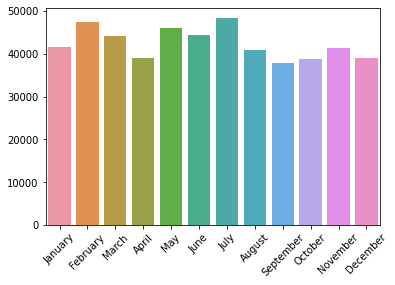

In [342]:
# Calculo el promedio mensual
for k, v in costos_mensuales.items():
    print(f"{calendar.month_name[k+1]} el promedio de costos fue de {round(sum(v)/len(v))}")
    
for k, v in costos_mensuales.items():
    costos_mensuales[k] = round(sum(v)/len(v))

# Obtengo una lista de los promedios de costos mensuales
lista_costos_mensuales = list(costos_mensuales.values())

# Grafico
lista = [calendar.month_name[x+1] for x in range(len(lista_costos_mensuales))]
ax = sb.barplot(x=lista, y=lista_costos_mensuales)
for item in ax.get_xticklabels():
    item.set_rotation(45)

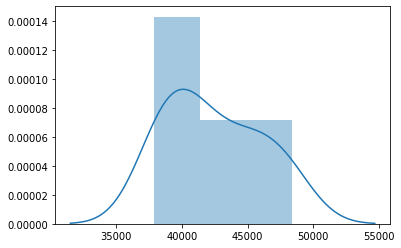

In [343]:
grafico = sb.distplot(lista_costos_mensuales)